# PREDICTING LIFE EXPECTANCY

IMPORTING LIBRARIES

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

IMPORTING DATASET

In [4]:
dataset = pd.read_csv('Life_Expectancy_Data.csv')
print(dataset.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


CHECK FOR NULL VALUES

In [5]:
df = dataset.isnull().sum()
print(df)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


FILL MISSING VALUES

In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = SimpleImputer()

impu = SimpleImputer(missing_values=np.nan, strategy='mean')
impu = SimpleImputer()

# By most Frequent
replace = ['Alcohol','Hepatitis B','Schooling',' thinness  1-19 years',' thinness 5-9 years',
           ' BMI ','Diphtheria ','Adult Mortality','Polio','Income composition of resources','GDP', 'Population', 'Total expenditure']
for i in replace:
    dataset[i] = imp.fit_transform(np.array(dataset[i]).reshape(-1,1))


In [7]:
df1 = dataset.isnull().sum()
print(df1)

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources     0
Schooling                           0
dtype: int64


DROP ROWS THAT HAVE NULL VALUE IN OUTPUT SERIES AND CHECK TO CONFIRM

In [8]:
dataset = dataset.dropna()

## Check null values again
df2 = dataset.isnull().sum()

DIVIDE X AND Y

In [9]:
X = dataset.drop('Life expectancy ', axis=1)
Y = dataset['Life expectancy ']

HANDLING CATEGORICAL DATA

In [10]:
temp = pd.get_dummies(X['Status'], drop_first=True)
X.drop(['Status'], axis=1, inplace=True)
X = pd.concat([X, temp], axis=1)

"""temp = pd.get_dummies(X['Country'], drop_first=True)"""
X.drop(['Country'], axis=1, inplace=True)
##X = pd.concat([X, temp], axis=1)


SPLITTING TEST AND TRAIN DATA

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

FEATURE SCALING (OPTIONAL)

In [12]:
"""sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

'sc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

LINEAR REGRESSION MODEL

In [13]:
reg = LinearRegression().fit(X_train, y_train)

MAKE PREDICTIONS

In [14]:
pred = reg.predict(X_test)

SCORING

In [15]:
print(r2_score(y_test, pred))

0.8411190093057206


PLOT GRAPHS FOR PREDICTIONS

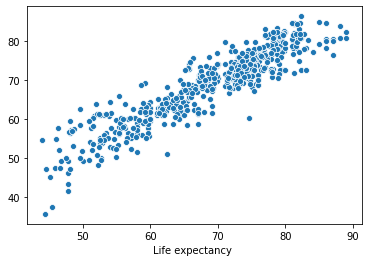

In [16]:
ax = sns.scatterplot(x=y_test, y=pred)
